In [1]:
import pandas as pd
import time
import platform
import sys
import zipfile
from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

seed = 1234

In [2]:
model_name_list = ['convE_transductive','tuckER_transductive','rotatE_transductive','rgcn_transductive','quatE_transductive',
                   'nodepiece_transductive_2','nodepiece_inductive_2']
for model_name in model_name_list:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'All data/{model_name}.zip'
    extract_dir =f'All data/{model_name}'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

In [3]:
model_name_list_0 = ['convE_0_transductive','tuckER_0_transductive','rotatE_0_transductive','rgcn_0_transductive',
                     'quatE_0_transductive','nodepiece_0_transductive_2','nodepiece_0_inductive_2']
for model_name in model_name_list_0:
    
    # specify the path to the zip file and the destination directory for the unzipped files
    zip_file_path = f'Subset 0/{model_name}.zip'
    extract_dir =f'Subset 0/{model_name}'

    # create a ZipFile object and extract all files to the destination directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

In [4]:
def plot_information(information):

    information_df_list = []
    for model_name in model_name_list:
        temp_df = pd.read_csv(f'All data/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
        information_df = information_df_list[0]
    for model_name in model_name_list_0:
        temp_df = pd.read_csv(f'Subset 0/{model_name}/{model_name}/{model_name}_information.csv')
        temp_df = temp_df[temp_df['name']==information].rename(columns={'value':model_name}).drop(columns=['Unnamed: 0'],axis=1)
        information_df_list.append(temp_df)
        information_df = information_df_list[0]
    for i in range(1, len(information_df_list)):
        information_df = pd.merge(information_df,information_df_list[i],on='name')
    information_df = information_df.drop(columns=['name'],axis=1)
    names = list(information_df)
    information_df = information_df.transpose()
    column = list(information_df)[0]
    column_dict = {'convE_transductive': "ConvE", "tuckER_transductive":"TuckER", "rotatE_transductive":"RotatE",
                  "rgcn_transductive":"R-GCN","quatE_transductive":"QuatE","nodepiece_transductive_2":"NodePiece",
                  "nodepiece_inductive_2":"NodePiece Inductive","anyburl_100_transductive":"AnyBURL",
                  'metric':"Metric","anyburl":"AnyBURL"}
    information_df.rename(columns=column_dict,inplace=True)
    information_df = information_df.rename(columns={column:information})
    information_df[information]=information_df[information].astype(float)
    display(information_df)
    X_axis = np.arange(len(model_name_list))
    entire_dataset = []
    subset_0 = []
    for i in range(len(model_name_list)):
        entire_dataset.append(information_df.iloc[i]['training duration'])
        subset_0.append(information_df.iloc[i+len(model_name_list)]['training duration'])
    plt.bar(X_axis+0.1,entire_dataset, 0.2, label = "Entire Dataset")
    plt.bar(X_axis-0.1,subset_0, 0.2, label = "Subset data")
    x_values = model_name_list
    plt.xticks(np.arange(0,len(x_values)), x_values, rotation=90)
    plt.xlabel("Models")
    plt.ylabel("Seconds")
    plt.title("Models training time (s)")
    plt.legend()
    plt.show()

,training duration
convE_transductive,152.307357
tuckER_transductive,2184.641061
rotatE_transductive,1083.521330
rgcn_transductive,162.562170
quatE_transductive,5897.180882
nodepiece_transductive_2,249.551234
nodepiece_inductive_2,72.856738
convE_0_transductive,102.707103
tuckER_0_transductive,447.257632
rotatE_0_transductive,243.895983


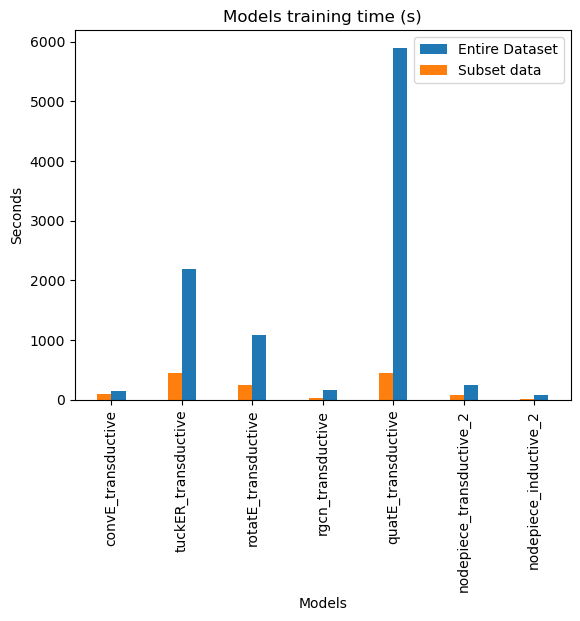

In [5]:
plot_information('training duration')